**<h1>HISTOGRAMAS Y TRANSFORMACIONES DE INTENSIDA EN IMAGENES</h1>**


## Objetivos

- Las transformaciones de píxeles son operaciones que se realiza un píxel a la vez. En este laboratorio, comenzará creando histogramas. Los histogramas muestran la intensidad de la imagen y se pueden utilizar para optimizar las características de la imagen. A continuación, aplicará Transformaciones de intensidad, lo que hará que los objetos sean más fáciles de ver al mejorar el contraste y el brillo de la imagen. En la última parte de la práctica de laboratorio, utilizará la creación de umbrales para segmentar objetos a partir de imágenes.

---

### Descargando las imagenes para el lab:

In [2]:
!wget http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/goldhill.bmp -O goldhill.bmp
!wget http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg -O cameraman.jpeg
!wget http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/zelda.png -O zelda.png
!wget http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/mammogram.png -O mammogram.png

--14:01:50--  http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
           => `lenna.png'
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud:80... connected!
HTTP request sent, awaiting response... 200 OK
Length: 473,831 [image/png]

    0K .......... .......... .......... .......... .......... 10% @  88.18 KB/s
   50K .......... .......... .......... .......... .......... 21% @  48.83 MB/s
  100K .......... .......... .......... .......... .......... 32% @ 292.40 KB/s
  150K .......... .......... .......... .......... .......... 43% @ 384.62 KB/s
  200K .......... .......... .......... .......... .......... 54% @ 252.53 KB/s
  250K .......... .......... .......... .......... .......... 64% @ 446.43 KB/s
  300K .......... .......... .......... .......... .......... 75% @ 303.03 KB/s
  350K .......... .......... .......... .......... .......... 86% @ 833.33 KB/s
  400

---
---

- Estaremos utilizando las siguientes funciones importadas en el laboratorio:

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

- Primero, definamos una función auxiliar para trazar dos imágenes una al lado de la otra. No necesitará comprender este código en este momento, pero esta función se usará repetidamente en este tutorial para mostrar los resultados.

In [2]:
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

- Definamos otra función auxiliar. El siguiente trazará dos histogramas uno al lado del otro. Nuevamente, no es necesario que comprenda el cuerpo de esta función en este momento.

In [3]:
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

---
## Histogramas

- Un histograma cuenta el número de ocurrencias de los valores de intensidad de los píxeles y es una herramienta útil para comprender y manipular imágenes. Usamos `cv.calcHist()` para generar el histograma. Estos son los valores de los parámetros:

`cv2.calcHist (CV array:[imagen] este es el canal de imagen: [0], para este curso siempre será [None], el número de bins: [L], el rango de índice de bins: [0, L-1])`

- Para imágenes reales, L es 256.

### Ejemplo de juguete "Toy Example"

- Considere la matriz de juguetes con valores de intensidad que van de 0 a 2. Podemos crear un histograma. Su primer elemento es el número de ceros en la imagen (en este caso, 1); su segundo elemento es el número de unos en la imagen (en este caso, 5), y así sucesivamente.


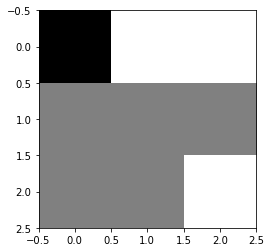

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [4]:
toy_image = np.array([[0,2,2],[1,1,1],[1,1,2]],dtype=np.uint8)
plt.imshow(toy_image, cmap="gray")
plt.show()
print("toy_image:",toy_image)

- Podemos usar la función `caclHist`, en este caso, usamos solo tres bins ya que solo hay tres valores, y el índice de los bins es de 1 a 3.

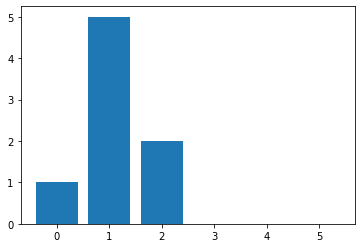

In [5]:
plt.bar([x for x in range(6)],[1,5,2,0,0,0])
plt.show()

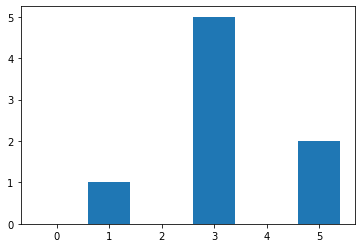

In [6]:
plt.bar([x for x in range(6)],[0,1,0,5,0,2])
plt.show()

El histograma es una funcion donde $h\[r]$  donde   $r \in {0,1,2} $. En el ejemplo de encima  $h\[0]=1$,$h\[1]=5$ and $h\[2]=3$

---

## Histogramas de escala de grises

- Los histogramas se utilizan en imágenes en escala de grises. Las imágenes en escala de grises se utilizan en muchas aplicaciones, incluidas las médicas e industriales. Las imágenes en color se dividen en luminancia y crominancia. La luminancia es la parte de la escala de grises y generalmente se procesa en muchas aplicaciones. Considere la siguiente imagen de "Gold Hill":



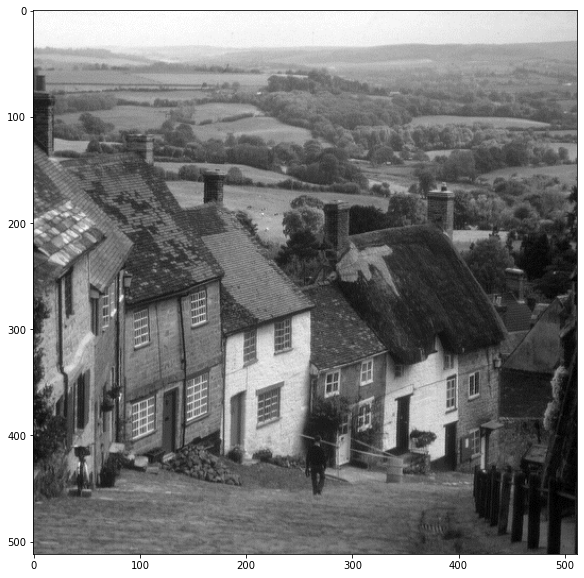

In [7]:
goldhill = cv2.imread("goldhill.bmp", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(goldhill,cmap="gray")
plt.show()

- Podemos calcular el histograma usando la función `calcHist` del módulo `cv2` de la siguiente manera, la forma es 256.

In [9]:
hist = cv2.calcHist([goldhill],[0], None, [256], [0,256])

- Podemos trazarlo como un gráfico de barras, el eje 𝑥 son las intensidades de píxeles y el eje 𝑦 es el número de veces que ocurrió el valor de intensidad de píxel correspondiente en el eje 𝑥.

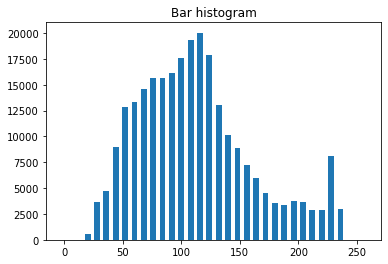

In [10]:
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)
plt.title("Bar histogram")
plt.show()

El histograma es una funcion, donde: $h\[r]$  y donde: $r \in {0,1,..,255} $.

- Podemos convertirlo en una función de masa de probabilidad normalizándolo por el número de píxeles:

In [11]:
PMF = hist / (goldhill.shape[0] * goldhill.shape[1])

- Podemos graficar como una función continua:

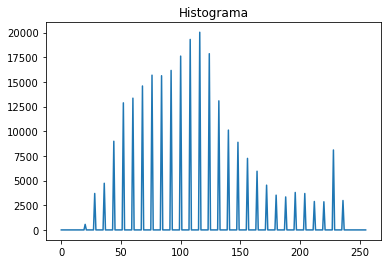

In [12]:
plt.plot(intensity_values,hist)
plt.title("Histograma")
plt.show()

- También podemos aplicar un histograma a cada canal de color de la imagen:

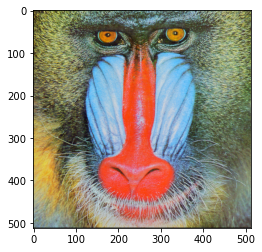

In [13]:
baboon = cv2.imread("baboon.png")
plt.imshow(cv2.cvtColor(baboon,cv2.COLOR_BGR2RGB))
plt.show()

- En el ciclo, el valor de `i` especifica para qué canal de color `calcHist` va a calcular el histograma.

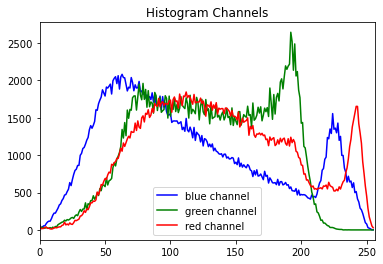

In [14]:
color = ('blue', 'green', 'red')
for i,col in enumerate(color):
    histr = cv2.calcHist([baboon],[i],None,[256],[0,256])
    plt.plot(intensity_values,histr,color = col,label=col+" channel")
    
    plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()

---

## Transformaciones de intensidades

- Es útil pensar en una imagen como una función  $f(x,y)$ en lugar de una matriz en este punto, donde `x` es el índice de fila e` y` es el índice de columna. Puede aplicar una transformación $T$ a la imagen y obtener una nueva imagen:

$$
g(x,y)=T(f(x,y))
$$

- Una transformación de intensidad depende de un solo punto  $(x,y)$. Por ejemplo, puede aplicar una transformación lineal  $g(x,y) = 2f(x,y) + 1$; esto multiplicará cada píxel de la imagen por dos y agregará uno.

- Como la transformacion de intensidad solo depende de un valor; como resultado, a veces se lo denomina mapeo de nivel de grises. La variable if $r$ es la intensidad del nivel de gris, similar a los valores del histograma. La nueva salida s viene dada por:
$$
s=T(r)
$$


## Negativos de Imagenes

- Considere una imagen con $L$ valores de intensidad, que van desde $\[0,L-1]$.  Podemos revertir los niveles de intensidad aplicando lo siguiente:

$$
g(x,y)=L-1-f(x,y)
$$

- Usando la notación de la función de transformación de intensidad

$$
s = L - 1 - r
$$

- Esto se llama negativo de imagen. Para $L= 256$ las formulas se simplifican a:

$$
g(x,y)=255-f(x,y) \qquad \mbox{and} \qquad s=255-r
$$

- Podemos realizar una transformación de intensidad en la toy image, donde  $L = 3$:

In [17]:
neg_toy_image = -1 * toy_image + 255

print("toy image\n", toy_image)
print("image negatives\n", neg_toy_image)

toy image
 [[0 2 2]
 [1 1 1]
 [1 1 2]]
image negatives
 [[255 253 253]
 [254 254 254]
 [254 254 253]]


- Vemos que las intensidades más oscuras se vuelven más brillantes y las más brillantes se vuelven más oscuras, las intensidades medias siguen siendo las mismas.

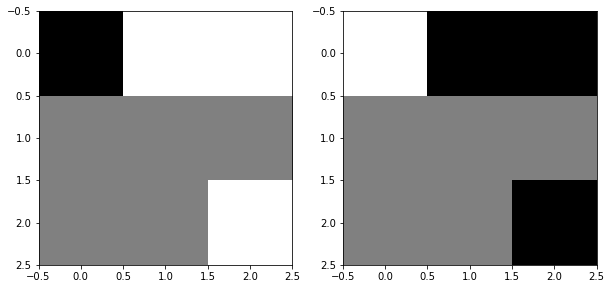

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]
image negatives
 [[255 253 253]
 [254 254 254]
 [254 254 253]]


In [19]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1) 
plt.imshow(toy_image,cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(neg_toy_image,cmap="gray")
plt.show()
print("toy_image:",toy_image)
print("image negatives\n", neg_toy_image)

- La inversión de la intensidad de la imagen tiene muchas aplicaciones, incluida la simplificación del análisis de imágenes médicas. Considere la mamografía con microcalcificaciones en el cuadrante superior:

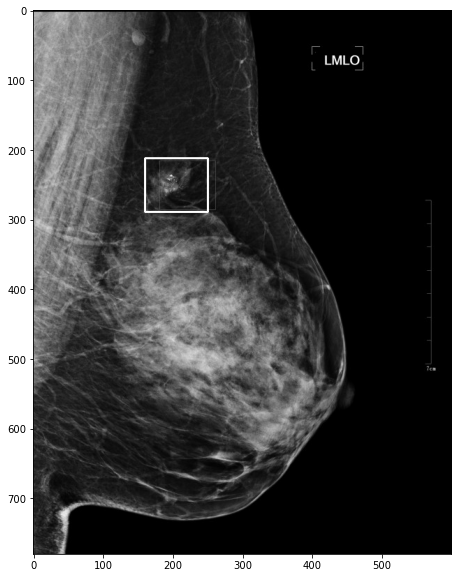

In [21]:
image = cv2.imread("mammogram.png", cv2.IMREAD_GRAYSCALE)
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color = (255), thickness=2)

plt.figure(figsize=(10,10))
plt.imshow(image, cmap="gray")
plt.show()

- Podemos aplicar la transformacion de intensidad en este caso

In [22]:
img_neg = -1 * image +255

- Vemos las microcalcificaciones en las imágenes negativas que es más fácil de analizar:

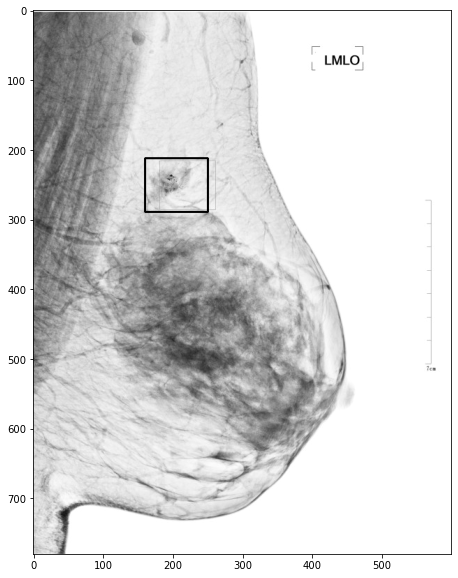

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(img_neg, cmap="gray")
plt.show()

---

## Ajuste de Brillo y Contraste

Podemos usar la multiplicación por  $\alpha$  para el control del contraste y la suma por $\beta$ para mejorar el control del brillo.

- Esto también aplica la Transformación de Intensidad. La imagen es $f(x,y)$ y la imagen transformada es $g(x,y)$, donde $g(x,y) = \alpha f(x,y) + \beta$.

- En lugar de implementar mediante operaciones de matriz, podemos usar la función  <code>convertScaleAbs</code>. 
Escala, calcula valores absolutos y convierte el resultado a 8 bits para que los valores caigan entre $\[0,255]$.

Para controlar el brillo, podemos establecer  $\alpha$ a 1 y $\beta$ a 100: recuerde la imagen de Good Hill, es oscura y borrosa, así que veamos si podemos mejorarla.

In [50]:
alpha = 1    #Control de contraste simple
beta = 100   # Control de brillo simple
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

- Podemos trazar la imagen más brillante, es mucho más brillante:

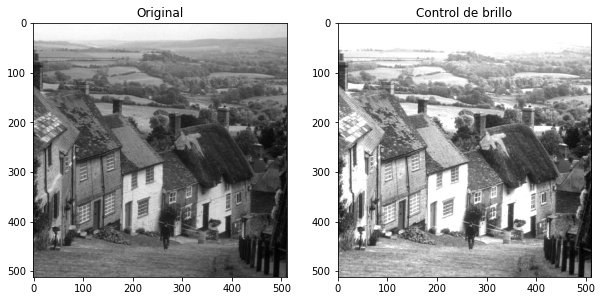

In [51]:
plot_image(goldhill, new_image, title_1 = "Original", title_2 = "Control de brillo")


- Vemos que el histograma de la imagen más brillante se desplaza:

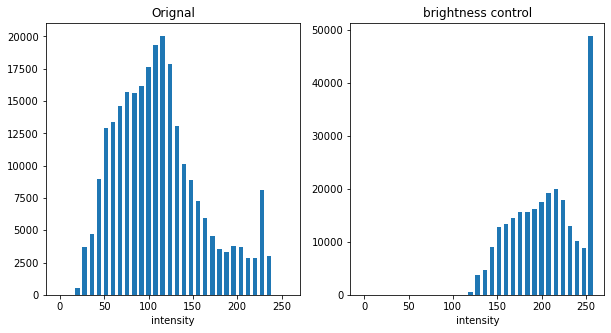

In [52]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Orignal", "brightness control")

- Podemos aumentar el contraste aumentando $\alpha$:

In [53]:
plt.figure(figsize=(10,5))
alpha = 2    #Control de contraste simple
beta = 0     #Control de brillo Simple
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

<Figure size 720x360 with 0 Axes>

- Podemos trazar la imagen y su correspondiente histograma:

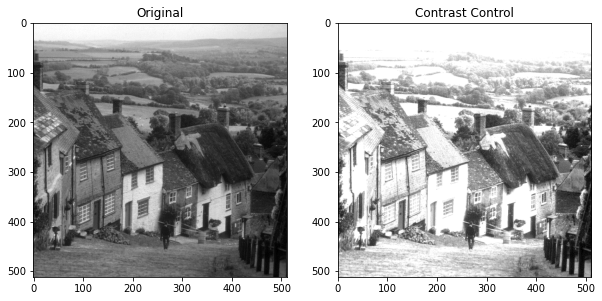

In [54]:
plot_image(goldhill, new_image, "Original", "Contrast Control")

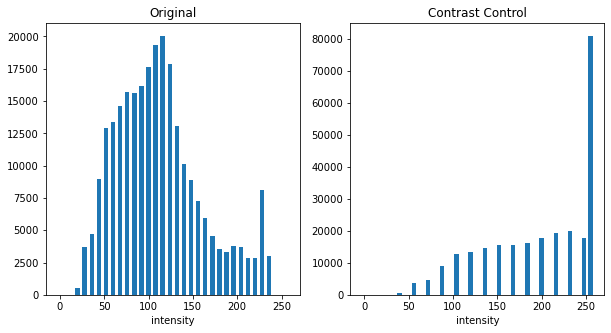

In [55]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Original", "Contrast Control")

- Al trazar la imagen, vemos que es demasiado brillante. Podemos adaptar el brillo oscureciendo la imagen y aumentando el contraste al mismo tiempo.

In [56]:
plt.figure(figsize=(10,5))
alpha = 3 
beta = -200
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta= beta)

<Figure size 720x360 with 0 Axes>

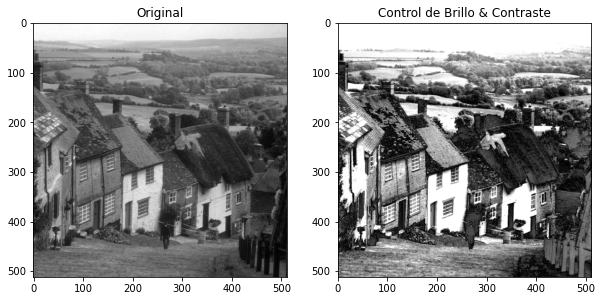

In [57]:
plot_image(goldhill, new_image, "Original", "Control de Brillo & Contraste")

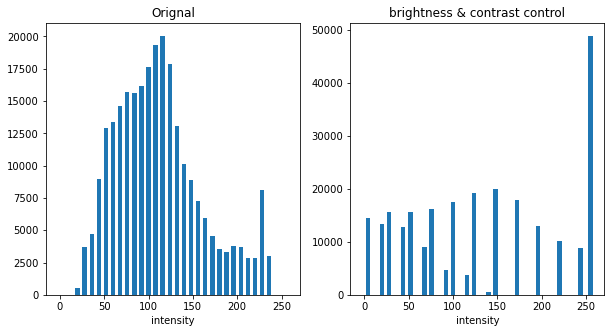

In [58]:
plt.figure(figsize=(10,5))
plot_hist(goldhill, new_image, "Orignal", "brightness & contrast control")

- Existen otros métodos no lineales para mejorar el contraste y el brillo, estos métodos tienen diferentes conjuntos de parámetros. En general, es difícil ajustar manualmente el parámetro de contraste y brillo, pero existen algoritmos que mejoran el contraste automáticamente.

---

##  Ecualización de histograma

- La ecualización de histograma aumenta el contraste de las imágenes, al ampliar el rango de píxeles de la escala de grises; Lo hace aplanando el histograma. Simplemente aplicamos la función `cv2.equalizeHist`.

In [59]:
zelda = cv2.imread("zelda.png", cv2.IMREAD_GRAYSCALE)
new_image = cv2.equalizeHist(zelda)

- Podemos comparar la imagen antes y después de la Ecualización del histograma, vemos que se mejora el contraste. Vemos que después de aplicar la Ecualización de histograma, el histograma se estira:

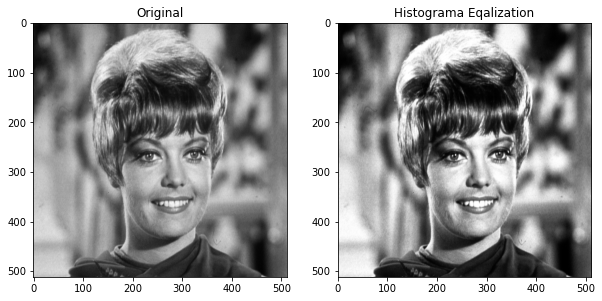

In [60]:
plot_image(zelda, new_image, "Original", "Histograma Eqalization")

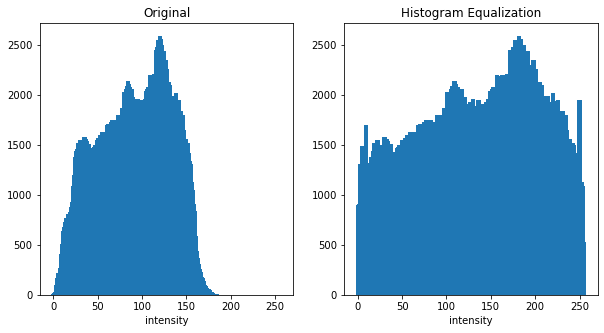

In [62]:
plt.figure(figsize=(10,5))
plot_hist(zelda, new_image, "Original", "Histogram Equalization")

---

## Umbralización y segmentación simple

- (Thresholding) Los umbrales se utilizan en la segmentación de imágenes, esto significa extraer objetos de una imagen. 

- La segmentación de imágenes se utiliza en muchas aplicaciones, incluida la extracción de texto, imágenes médicas e imágenes industriales. 

- Umbralizar una imagen requiere un umbral; Si un píxel en particular (i, j) es mayor que ese umbral, establecerá ese píxel en un valor generalmente 1 o 255; de lo contrario, lo establecerá en otro valor, generalmente cero.

- **Podemos escribir una función de Python que realizará el umbral y generará una nueva imagen dada una imagen de entrada en escala de grises:**

In [63]:
def thresholding(input_img,threshold,max_value=255, min_value=0):
    N,M=input_img.shape
    image_out=np.zeros((N,M),dtype=np.uint8)
        
    for i  in range(N):
        for j in range(M):
            if input_img[i,j]> threshold:
                image_out[i,j]=max_value
            else:
                image_out[i,j]=min_value
                
    return image_out 

- Considere la siguiente toy image:

In [64]:
toy_image

array([[0, 2, 2],
       [1, 1, 1],
       [1, 1, 2]], dtype=uint8)

- Podemos aplicar el umbral, estableciendo todos los valores menores de dos a cero.

In [65]:
threshold = 1
max_value = 2
min_value = 0
thresholding_toy = thresholding(toy_image, threshold=threshold, max_value=max_value, min_value=min_value)
thresholding_toy

array([[0, 2, 2],
       [0, 0, 0],
       [0, 0, 2]], dtype=uint8)

- Podemos comparar las dos imágenes. En la nueva imagen vemos que todos los valores de gris ahora son negros:

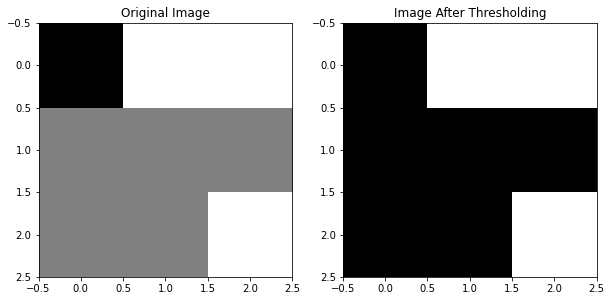

In [66]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(toy_image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(thresholding_toy, cmap="gray")
plt.title("Image After Thresholding")
plt.show()

- Considere la imagen del camarógrafo:

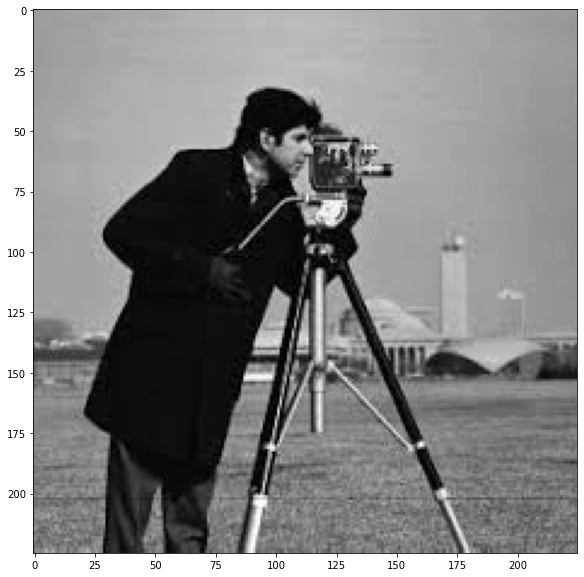

In [68]:
image = cv2.imread("cameraman.jpeg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(image, cmap="gray")
plt.show()

- Podemos ver el histograma como dos puntos, esto significa que hay una gran proporción de píxeles en esos dos rangos:

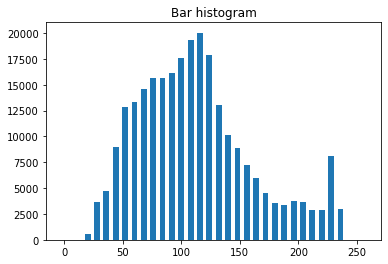

In [70]:
hist = cv2.calcHist([goldhill], [0], None, [256], [0, 256])
plt.bar(intensity_values, hist[:, 0], width=5)
plt.title("Bar histogram")
plt.show()

- El camarógrafo corresponde a los píxeles más oscuros, por lo que podemos configurar el Umbral de tal manera que segmente al camarógrafo. En este caso, parece ser un poco menos de 90, intentémoslo:

In [71]:
threshold = 87
max_value = 255
min_value = 0
new_image = thresholding(image, threshold=threshold, max_value=max_value, min_value=min_value)

- Vemos que los píxeles correspondientes al camarógrafo ahora son cero y el resto está configurado en 255:

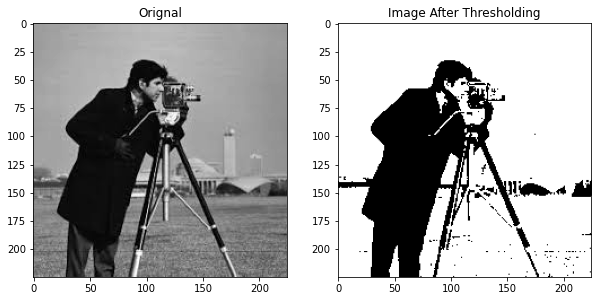

In [72]:
plot_image(image, new_image, "Orignal", "Image After Thresholding")

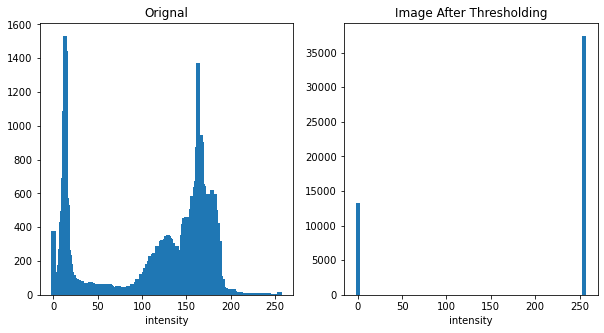

In [73]:
plt.figure(figsize=(10,5))
plot_hist(image, new_image, "Orignal", "Image After Thresholding")

- La función `cv.threshold` Aplica un umbral a la imagen gris, con los siguientes parámetros:

`cv.threshold(grayscale image, threshold value, maximum value to use, thresholding type)`

- El tipo de umbral de parámetro es el tipo de umbral que nos gustaría realizar. Por ejemplo, tenemos un umbral básico: `cv2.THRESH_BINARY` este es el tipo que implementamos en el funcion `thresholding`, es solo un número:

In [75]:
cv2.THRESH_BINARY

0

- Podemos aplicar umbrales a la imagen de la siguiente manera:

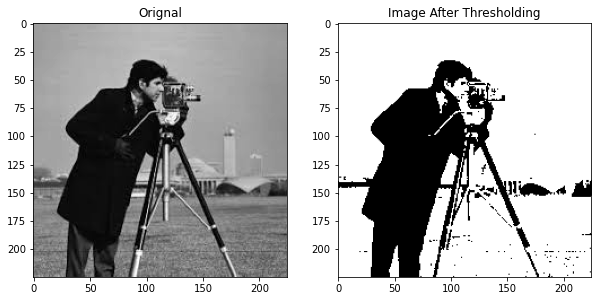

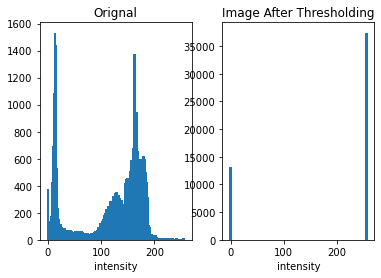

In [76]:
ret, new_image = cv2.threshold(image,threshold,max_value,cv2.THRESH_BINARY)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

- `ret` es el valor de umbral y `new_image` es la imagen después de que se ha aplicado el umbral. Hay diferentes tipos de umbral, por ejemplo, cv2.THRESH_TRUNC no cambiará los valores si los píxeles son menores que el valor del umbral:

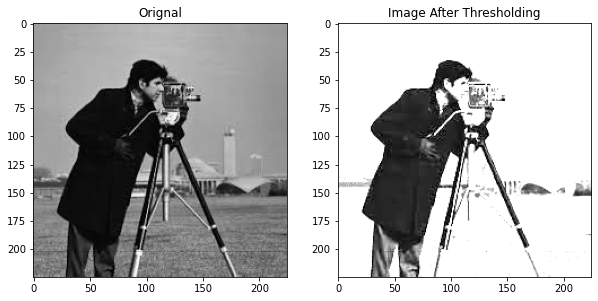

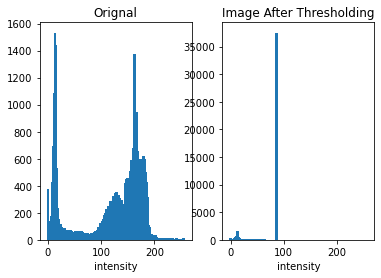

In [77]:
ret, new_image = cv2.threshold(image,86,255,cv2.THRESH_TRUNC)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_hist(image, new_image,"Orignal","Image After Thresholding")

- Vemos que los elementos más oscuros no han cambiado y los valores más claros se establecen en 255.

- El método `cv2.THRESH_OTSU` de Otsu evita tener que elegir un valor y lo determina automáticamente, utilizando el histograma.

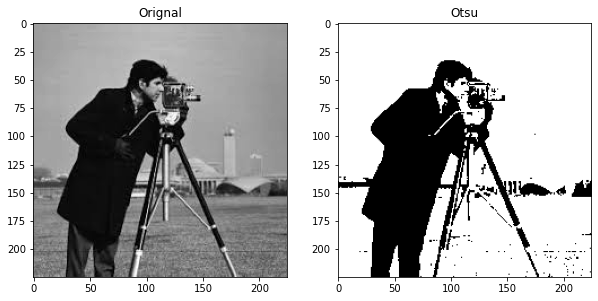

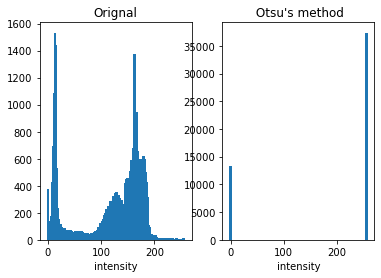

In [78]:
ret, otsu = cv2.threshold(image,0,255,cv2.THRESH_OTSU)
plot_image(image,otsu,"Orignal","Otsu")
plot_hist(image, otsu,"Orignal"," Otsu's method")

- Asignamos la primera fila de píxeles de la matriz original a la última fila de la nueva matriz. Repetimos el proceso para cada fila, incrementando el número de fila de la matriz original y disminuyendo el índice de fila de la nueva matriz asignando los píxeles en consecuencia.

In [79]:
ret

88.0

- Esto concluye este Tutorial.